In [1]:
res_path = "C:\\Users\\Geoffroy Leconte\\Documents\\doctorat\\code\\docGL\\amdahl_benchmarks\\results"
using DataFrames, SolverBenchmark, SolverTools, JLD2, Plots

function open_file(path)
    file = jldopen(path, "r")
    df_out = file["stats"]
    close(file)
    return df_out
end

open_file (generic function with 1 method)

In [2]:
fgur3 = jldopen(string(res_path, "\\gurobi_scaling_lp3.jld2"), "r")  # no display
gurobi = fgur3["stats"];
close(fgur3)
fcplex3 = jldopen(string(res_path, "\\cplex_scaling_lp3.jld2"), "r") # maj cplex.jl, single thread 
cplex = fcplex3["stats"];
close(fcplex3)
fxpress2 = jldopen(string(res_path, "\\xpress_scaling_lp2.jld2"), "r")  #tol pdd 1e-8, feas 1e-6
xpress = fxpress2["stats"];
close(fxpress2)

In [3]:
rip_mono = open_file(string(res_path, "\\G-2021-03_lp_mono.jld2"));

rip_mono12 = open_file(string(res_path, "\\ripqp_mono_1_lp.jld2"));
rip_mono2 = open_file(string(res_path, "\\ripqp_mono_2_lp.jld2")); 
rip_mono1 = open_file(string(res_path, "\\ripqp_mono_PC_lp.jld2"));
rip_mono_nrtol1 = open_file(string(res_path, "\\ripqp_mono_nrtol_1_lp.jld2"));
rip_mono_d1 = open_file(string(res_path, "\\ripqp_dynamic_1_lp.jld2"));
rip_mono_c1 = open_file(string(res_path, "\\ripqp_ccorr_1_lp.jld2"));
rip_mono_c2 = open_file(string(res_path, "\\ripqp_ccorr_2_lp.jld2")); # ccorr time
rip_mono_c3 = open_file(string(res_path, "\\ripqp_ccorr_3_lp.jld2")); # ccorr time, increase delta
rip_multi1 = open_file(string(res_path, "\\ripqp_multi_1_lp.jld2"));
rip_multi_d1 = open_file(string(res_path, "\\ripqp_multi_dynamic_1_lp.jld2"));

# K2_5
rip_monoK251 = open_file(string(res_path, "\\ripqp_mono_K25_1_lp.jld2"));
rip_mono_dK251 = open_file(string(res_path, "\\ripqp_dynamic_K25_1_lp.jld2"));
rip_multiK251 = open_file(string(res_path, "\\ripqp_multi_K25_1_lp.jld2"));
rip_multi_dK251 = open_file(string(res_path, "\\ripqp_multi_dynamic_K25_1_lp.jld2"));

# K2_5 one step
rip_monoosK251 = open_file(string(res_path, "\\ripqp_mono_osK25_1_lp.jld2")); # r, γ =  T(0.999), T(0.05)
rip_monoosK252 = open_file(string(res_path, "\\ripqp_mono_osK25_2_lp.jld2")); # r, γ =  T(0.95), T(0.1)
rip_monoIPFK21 = open_file(string(res_path, "\\ripqp_mono_IPFK2_1_lp.jld2")); # r, γ =  T(0.999), T(0.05)
rip_monoIPFK22 = open_file(string(res_path, "\\ripqp_mono_IPFK2_2_lp.jld2")); # r, γ =  T(0.95), T(0.1)

# comparisons zoom1 & refinement
rip_monoK2 = open_file(string(res_path, "\\ripqp_mono_K2_lp.jld2"));
rip_monoK22 = open_file(string(res_path, "\\ripqp_mono_K22_lp.jld2"));
rip_multiK2 = open_file(string(res_path, "\\ripqp_multi_K2_lp.jld2"));
rip_mono_z = open_file(string(res_path, "\\ripqp_mono_z_lp.jld2")); # ϵ_rbz = 1e-3
rip_mono_z2 = open_file(string(res_path, "\\ripqp_mono_z2_lp.jld2")); # ϵ_rbz = 1e-7
rip_multi_z = open_file(string(res_path, "\\ripqp_multi_z_lp.jld2")); # ϵ_pdd32 = 1e-4
rip_multi_z2 = open_file(string(res_path, "\\ripqp_multi_z2_lp.jld2")); # ϵ_pdd32 = 1.0 
rip_mono_r = open_file(string(res_path, "\\ripqp_mono_r_lp.jld2")); # ϵ_rbz = 1e-5
rip_mono_r2 = open_file(string(res_path, "\\ripqp_mono_r2_lp.jld2")); # ref pd
rip_multi_r = open_file(string(res_path, "\\ripqp_multi_r_lp.jld2")); 
rip_multi_r2 = open_file(string(res_path, "\\ripqp_multi_r2_lp.jld2")); # ϵ_pdd32 = 1.0 
rip_multi_r3 = open_file(string(res_path, "\\ripqp_multi_r3_lp.jld2")); # ϵ_pdd32 = 1.0  ref pd
rip_multi_r4 = open_file(string(res_path, "\\ripqp_multi_r4_lp.jld2")); # ϵ_pdd32 = 1.0  ref pd


In [20]:
stats_lp = Dict(
                :cplex => cplex,
                :gurobi => gurobi,
#               :ripqp_mono        => rip_mono,
#               :ripqp_mono1       => rip_mono1,
                :ripqp_mono12       => rip_mono12,
                :ripqp_mono2       => rip_mono2,
                # :ripqp_mono_nrtol1 => rip_mono_nrtol1,
#               :ripqp_mono_d1   => rip_mono_d1,
#                 :ripqp_mono_c1   => rip_mono_c1,
#                 :ripqp_mono_c2   => rip_mono_c2,
#                 :ripqp_mono_c3   => rip_mono_c3,
#               :rip_monoK251    => rip_monoK251,
#               :rip_mono_dK251  => rip_mono_dK251,
#                 :rip_monoK2      => rip_monoK2,
#                 :rip_monoK22      => rip_monoK22,
#                 :rip_mono_z      => rip_mono_z,
#                 :rip_mono_z2      => rip_mono_z2,
#                 :rip_mono_r      => rip_mono_r,
#                 :rip_mono_r2      => rip_mono_r2,
               )

Dict{Symbol,DataFrame} with 4 entries:
  :gurobi       => 87×30 DataFrame. Omitted printing of 23 columns…
  :cplex        => 87×30 DataFrame. Omitted printing of 23 columns…
  :ripqp_mono2  => 87×32 DataFrame. Omitted printing of 25 columns…
  :ripqp_mono12 => 87×32 DataFrame. Omitted printing of 25 columns…

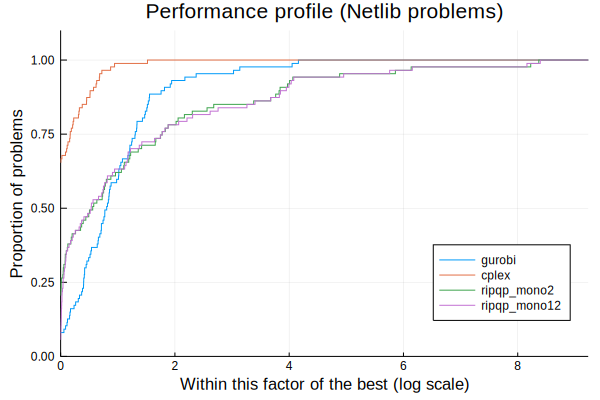

In [21]:
perf = performance_profile(stats_lp, df->df.elapsed_time)
plot!(perf, legend=:bottomright)
title!("Performance profile (Netlib problems)")

In [6]:
rip_mono1bis = copy(rip_mono1);
rip_mono1bis.iter .*= 2;

stats_it = Dict(
                :rip_mono1   => rip_mono1bis,
#                 :rip_monoosK251 => rip_monoosK251,
#                 :rip_monoosK252 => rip_monoosK252,
                :rip_monoIPFK21 => rip_monoIPFK21,
                :rip_monoIPFK22 => rip_monoIPFK22
                )

LoadError: UndefVarError: rip_mono1 not defined

In [7]:
perf2 = performance_profile(stats_it, df->df.iter)
plot!(perf2, legend=:bottomright)
title!("Performance profile (Netlib problems)")

LoadError: UndefVarError: performance_profile not defined

In [8]:
# stats multi
stats_lp = Dict(
                :rip_multiK2      => rip_multiK2,
                :rip_multi_z      => rip_multi_z,
#                 :rip_multi_z2      => rip_multi_z2,
                :rip_multi_r      => rip_multi_r,
#                 :rip_multi_r2      => rip_multi_r2,
#                 :rip_multi_r3      => rip_multi_r3,
#                 :rip_multi_r4      => rip_multi_r4,
               )

LoadError: UndefVarError: rip_multiK2 not defined

In [9]:
perf = performance_profile(stats_lp, df->df.iter)
plot!(perf, legend=:bottomright)
title!("Performance profile (Netlib problems)")

LoadError: UndefVarError: performance_profile not defined

In [10]:
withenv("COLUMNS" => 400, "LINES" => 200) do
    display(rip_mono2)
end

LoadError: UndefVarError: rip_mono2 not defined